# Estimación de la categoría edad por números de DNI

Se hace un análisis de los números de DNI por cuatrimestre para dividir a los estudiantes en grupos de edades.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../datos/dataset_ori.csv")
df = df.drop(['Apellido', 'NOMBRE'], axis=1)
print(len(df))

233697


In [3]:
# ¿Hay casos anómalos?
# Solo unos pocos con DNI muy bajo, los voy a imputar con el valor más probable.

print("DNI menores a 1 millón: ", len(df[df['dni']<1000000]))
print("DNI mayores a 90 millones: ", len(df[df['dni']>90000000]))
print("DNI entre 60 y 90 millones: ", len(df[(df['dni']<90000000) & (df['dni']>60000000)]))

DNI menores a 1 millón:  140
DNI mayores a 90 millones:  32007
DNI entre 60 y 90 millones:  0


In [4]:
# Creo una categoría por anio-cuat
df['cuatrimestre'] = df["anio"].astype(str) + "-" + df["cuat"].astype(str)
df[['anio', 'cuat', 'cuatrimestre', 'codCarrera', 'Carrera', 'facultad']].sample(n=5, random_state=4)

,anio,cuat,cuatrimestre,codCarrera,Carrera,facultad
158777,2017,2,2017-2,32.0,INGENIERIA QUIMICA,INGENIERIA
126911,2016,2,2016-2,99.0,sin definir,NaN
157087,2017,2,2017-2,39.0,Medicina,MEDICINA
41177,2013,1,2013-1,45.0,VETERINARIA,CIENCIAS VETERINARIAS
176962,2018,1,2018-1,999.0,no definida,NaN


In [5]:
df_ = df.loc[(df['dni']<90000000) & (df['dni']>1000000)]

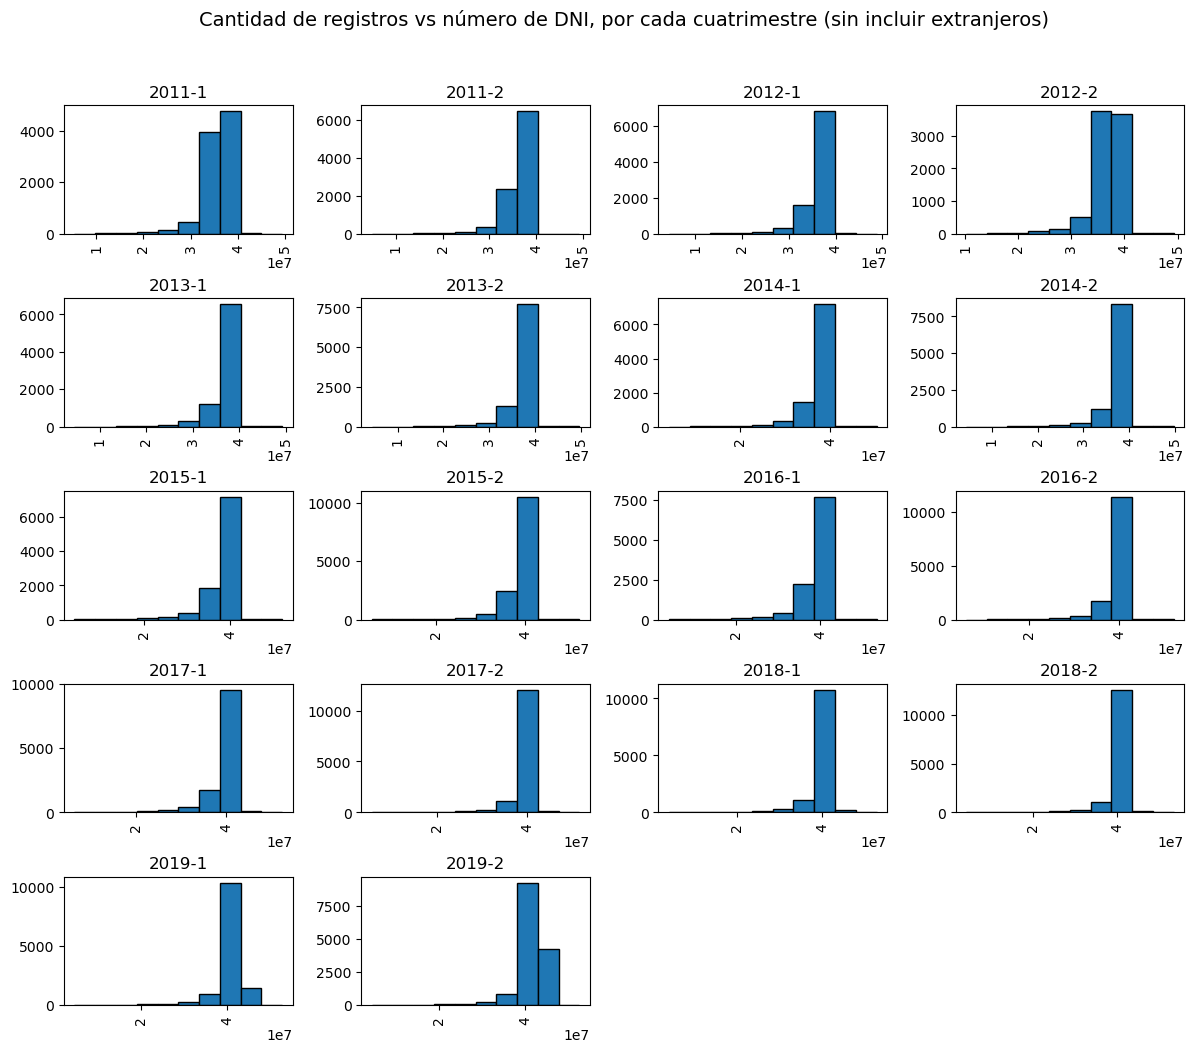

In [6]:
fig = df_['dni'].hist(by=df_['cuatrimestre'], edgecolor='black', figsize = (14,12))
plt.suptitle("Cantidad de registros vs número de DNI, por cada cuatrimestre (sin incluir extranjeros)", fontsize=14)
plt.show()

In [7]:
# Este código se mantiene para referencia, no se usa en este trabajo.
# Imputa el valor medio del bin más probable.

# cuatrimestres = df_['cuatrimestre'].unique()
# for c in cuatrimestres:
#     hist, bin_edges = np.histogram(df_.loc[df_['cuatrimestre']==c]['dni'])
#     m = np.argmax(hist)
#     nuevo_valor = (bin_edges[m+1]+bin_edges[m])/2
#     # Corrijo en el df original.
#     df.loc[df["dni"] < 1000000, "dni"] = nuevo_valor

## Extranjeros y dni anómalos

El número de extranjeros es grande, modifico sus dni con una distribución igual a la de los dni no extranjeros, tomando un elemento al azar entre los dni de cada cuatrimestre. Incluyo a los dni menores a 1 millón.

In [8]:
cuatrimestres = df_['cuatrimestre'].unique()
for c in cuatrimestres:
    values = df_.loc[df_['cuatrimestre']==c]['dni']
    nuevos = np.random.choice(values, len(df.loc[((df["dni"] > 90000000) | (df["dni"] < 1000000)) & (df['cuatrimestre']==c)]))
    # Corrijo en el df original.
    df.loc[((df["dni"] > 90000000) | (df["dni"] < 1000000)) & (df['cuatrimestre']==c), "dni"] = nuevos